In [ ]:
import sqlite3
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Connect to the SQLite database file
conn = sqlite3.connect("/content/drive/MyDrive/Colab Notebooks/Database (1).db")
# Replace ‘Database.db' with the path to your .db file if the file is in another directory.

# Create a cursor object
cursor = conn.cursor()

# Query to retrieve table names
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fetch all table names
tables = cursor.fetchall()

# Print the table names
for table in tables:
    print(table[0])

df = pd.read_sql_query('Select * from Heart_disease' , conn)

# Close the connection
conn.close()

Electric_cars
Fraud_detection
Heart_disease
Insurance_Prediction
New_Delhi_Reviews


In [ ]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.6,Yes,No,No,3.0,30.0,No,,55-59,White,Yes,Yes,,5.0,Yes,No,
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [ ]:
df.duplicated().sum()

18905

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(300890, 18)

In [ ]:
df = df.replace('', pd.NA)
df.isna().sum()

,0
HeartDisease,0
BMI,10613
Smoking,10137
AlcoholDrinking,0
Stroke,0
PhysicalHealth,10613
MentalHealth,0
DiffWalking,10137
Sex,15639
AgeCategory,0


In [ ]:
import pandas as pd

# Convert categorical columns
categorical_columns = [
    'HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke',
    'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic',
    'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease',
    'SkinCancer'
]

# Convert each categorical column
for col in categorical_columns:
    if col in df.columns:
        df[col] = df[col].astype('category')

# Convert numeric columns
numeric_columns = [
    'BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime'
]

# Convert each numeric column, handling errors
for col in numeric_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Check dtypes to verify the conversion
print(df.dtypes)


HeartDisease        category
BMI                  float64
Smoking             category
AlcoholDrinking     category
Stroke              category
PhysicalHealth       float64
MentalHealth         float64
DiffWalking         category
Sex                 category
AgeCategory         category
Race                category
Diabetic            category
PhysicalActivity    category
GenHealth           category
SleepTime            float64
Asthma              category
KidneyDisease       category
SkinCancer          category
dtype: object


In [ ]:
from sklearn.impute import SimpleImputer
import pandas as pd

def impute_missing_values(df):
    # Separate columns into continuous and categorical
    continuous_columns = df.select_dtypes(include=['float64', 'int64']).columns
    categorical_columns = df.select_dtypes(include=['category']).columns

    # Impute continuous features with the median
    median_imputer = SimpleImputer(strategy='median')
    if len(continuous_columns) > 0:
        df[continuous_columns] = median_imputer.fit_transform(df[continuous_columns])

    # Impute categorical features with the most frequent value
    frequent_imputer = SimpleImputer(strategy='most_frequent')
    if len(categorical_columns) > 0:
        df[categorical_columns] = frequent_imputer.fit_transform(df[categorical_columns])

        # Convert categorical columns back to 'category' dtype after imputation
        for col in categorical_columns:
            df[col] = df[col].astype('category')

    return df

# Apply the imputation function
df = impute_missing_values(df)

# Check the result
print(df.dtypes)


HeartDisease        category
BMI                  float64
Smoking             category
AlcoholDrinking     category
Stroke              category
PhysicalHealth       float64
MentalHealth         float64
DiffWalking         category
Sex                 category
AgeCategory         category
Race                category
Diabetic            category
PhysicalActivity    category
GenHealth           category
SleepTime            float64
Asthma              category
KidneyDisease       category
SkinCancer          category
dtype: object


In [ ]:
df.isna().sum()

,0
HeartDisease,0
BMI,0
Smoking,0
AlcoholDrinking,0
Stroke,0
PhysicalHealth,0
MentalHealth,0
DiffWalking,0
Sex,0
AgeCategory,0


In [ ]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [ ]:
import pandas as pd

# Create a new DataFrame to apply encoding
df_encoded = df.copy()

# Binary Encoding: Convert Yes/No to 1/0
binary_columns = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
                  'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']

# Replace Yes/No with 1/0
df_encoded[binary_columns] = df_encoded[binary_columns].replace({'Yes': 1, 'No': 0})

# Encoding for Sex (Male/Female)
df_encoded['Sex'] = df_encoded['Sex'].replace({'Male': 1, 'Female': 0})
df_encoded['Sex'] = pd.to_numeric(df_encoded['Sex'])

# Ensure all binary columns are numeric
for col in binary_columns:
    df_encoded[col] = pd.to_numeric(df_encoded[col], errors='coerce')

# Ordinal Encoding for AgeCategory
age_mapping = {'18-24': 0, '25-29': 1, '30-34': 2, '35-39': 3, '40-44': 4,
               '45-49': 5, '50-54': 6, '55-59': 7, '60-64': 8, '65-69': 9,
               '70-74': 10, '75-79': 11, '80 or older': 12}
df_encoded['AgeCategory'] = df_encoded['AgeCategory'].map(age_mapping)

# Ordinal Encoding for Diabetic
diabetic_mapping = {
    'No': 0,
    'No, borderline diabetes': 1,
    'Yes (during pregnancy)': 2,
    'Yes': 3
}
df_encoded['Diabetic'] = df_encoded['Diabetic'].map(diabetic_mapping)

# Ordinal Encoding for GenHealth
genhealth_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very good': 3,
    'Excellent': 4
}
df_encoded['GenHealth'] = df_encoded['GenHealth'].map(genhealth_mapping)

# One-Hot Encoding for Race
df_encoded = pd.get_dummies(df_encoded, columns=['Race'], drop_first=True)

# Convert all columns to numeric, using errors='coerce' to handle any non-numeric values
df_encoded = df_encoded.apply(pd.to_numeric, errors='coerce')

# Display the data types to confirm conversion
print(df_encoded.dtypes)

# Display a sample of the DataFrame
df_encoded.head()


HeartDisease          int64
BMI                 float64
Smoking               int64
AlcoholDrinking       int64
Stroke                int64
PhysicalHealth      float64
MentalHealth        float64
DiffWalking           int64
Sex                   int64
AgeCategory           int64
Diabetic              int64
PhysicalActivity      int64
GenHealth             int64
SleepTime           float64
Asthma                int64
KidneyDisease         int64
SkinCancer            int64
Race_Asian             bool
Race_Black             bool
Race_Hispanic          bool
Race_Other             bool
Race_White             bool
dtype: object


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0,16.60,1,0,0,3.0,30.0,0,0,7,...,3,5.0,1,0,0,False,False,False,False,True
1,0,20.34,0,0,1,0.0,0.0,0,0,12,...,3,7.0,0,0,0,False,False,False,False,True
2,0,26.58,1,0,0,20.0,30.0,0,1,9,...,1,8.0,1,0,0,False,False,False,False,True
3,0,24.21,0,0,0,0.0,0.0,0,0,11,...,2,6.0,0,0,1,False,False,False,False,True
4,0,23.71,0,0,0,28.0,0.0,1,0,4,...,3,8.0,0,0,0,False,False,False,False,True


In [ ]:
import pandas as pd
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

# Define features and target (replace df_encoded with your DataFrame)
X = df_encoded.drop('HeartDisease', axis=1)  # Features (excluding the target)
y = df_encoded['HeartDisease']  # Target

# Scale features for chi2 test
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  # Scaled array (without column names)

# Perform Chi-Square test between all columns and target
chi_scores = chi2(X_scaled, y)

# Create a DataFrame to display column names with their p-values
p_values_df = pd.DataFrame({
    'Feature': X.columns,  # Use original DataFrame to get column names
    'P-value': chi_scores[1]
})

# Print the result sorted by p-values
p_values_df.sort_values(by='P-value')


,Feature,P-value
1,Smoking,0.000000e+00
3,Stroke,0.000000e+00
4,PhysicalHealth,0.000000e+00
6,DiffWalking,0.000000e+00
8,AgeCategory,0.000000e+00
9,Diabetic,0.000000e+00
11,GenHealth,0.000000e+00
15,SkinCancer,0.000000e+00
14,KidneyDisease,0.000000e+00
7,Sex,1.638775e-187


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Define features and target
X = df_encoded.drop('HeartDisease', axis=1)  # Features
y = df_encoded['HeartDisease']  # Target

# Identify binary columns
binary_columns = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Asthma', 'KidneyDisease', 'SkinCancer', 'PhysicalActivity']

# Identify columns to be scaled (all except binary columns)
columns_to_scale = [col for col in X.columns if col not in binary_columns]

# Define StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to the columns to be scaled
X_scaled = X.copy()
X_scaled[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

# Verify the scaling applied to the correct columns
print("Scaled columns:", columns_to_scale)
print("Binary columns:", binary_columns)

# Ensure binary columns remain unchanged
X_scaled[binary_columns] = X[binary_columns]

# Add target column to the scaled DataFrame
df_scaled = pd.concat([X_scaled, y], axis=1)

# Display the scaled DataFrame
df_scaled.head()



Scaled columns: ['BMI', 'PhysicalHealth', 'MentalHealth', 'AgeCategory', 'Diabetic', 'GenHealth', 'SleepTime', 'Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_Other', 'Race_White']
Binary columns: ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Asthma', 'KidneyDisease', 'SkinCancer', 'PhysicalActivity']


,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,...,SleepTime,Asthma,KidneyDisease,SkinCancer,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,HeartDisease
0,-1.859623,1,0,0,-0.052279,3.180284,0,0,0.137281,2.534518,...,-1.420080,1,0,0,-0.165004,-0.2859,-0.31407,-0.193653,0.570025,0
1,-1.269635,0,0,1,-0.427602,-0.507428,0,0,1.532351,-0.417194,...,-0.057766,0,0,0,-0.165004,-0.2859,-0.31407,-0.193653,0.570025,0
2,-0.285269,1,0,0,2.074551,3.180284,0,1,0.695309,2.534518,...,0.623391,1,0,0,-0.165004,-0.2859,-0.31407,-0.193653,0.570025,0
3,-0.659139,0,0,0,-0.427602,-0.507428,0,0,1.253337,-0.417194,...,-0.738923,0,0,1,-0.165004,-0.2859,-0.31407,-0.193653,0.570025,0
4,-0.738014,0,0,0,3.075412,-0.507428,1,0,-0.699762,-0.417194,...,0.623391,0,0,0,-0.165004,-0.2859,-0.31407,-0.193653,0.570025,0


In [ ]:
import xgboost as xgb
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import pandas as pd
import numpy as np

# Assuming you have the feature set 'X' and target 'y'
X = df_scaled.drop('HeartDisease', axis=1)
y = df_scaled['HeartDisease']

# Step 1: Initialize XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Step 2: Fit XGBoost model on the entire dataset to compute feature importance
xgb_model.fit(X, y)

# Step 3: Get feature importance using SelectFromModel
selection = SelectFromModel(xgb_model, threshold="mean", prefit=True)
X_selected = selection.transform(X)

# Step 4: Perform cross-validation on the selected features
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize XGBoost model for cross-validation
xgb_model_cv = xgb.XGBClassifier(random_state=42)

# Perform cross-validation on the selected features
cv_scores = cross_val_score(xgb_model_cv, X_selected, y, cv=cv, scoring='accuracy')

# Print the average accuracy score across folds
print(f"Cross-Validation Accuracy with selected features: {np.mean(cv_scores):.4f}")

# Optional: Get feature importances and rankings
importances = xgb_model.feature_importances_
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importance Rankings:")
print(feature_importances)


Cross-Validation Accuracy with selected features: 0.9107
Feature Importance Rankings:
             Feature  Importance
8        AgeCategory    0.191950
11         GenHealth    0.178233
3             Stroke    0.164092
7                Sex    0.085723
14     KidneyDisease    0.055801
9           Diabetic    0.052017
6        DiffWalking    0.047447
1            Smoking    0.035599
20        Race_White    0.028472
13            Asthma    0.018265
2    AlcoholDrinking    0.016906
4     PhysicalHealth    0.015950
17        Race_Black    0.014287
15        SkinCancer    0.012696
0                BMI    0.012448
18     Race_Hispanic    0.012142
5       MentalHealth    0.012021
12         SleepTime    0.011826
19        Race_Other    0.011800
16        Race_Asian    0.011671
10  PhysicalActivity    0.010652


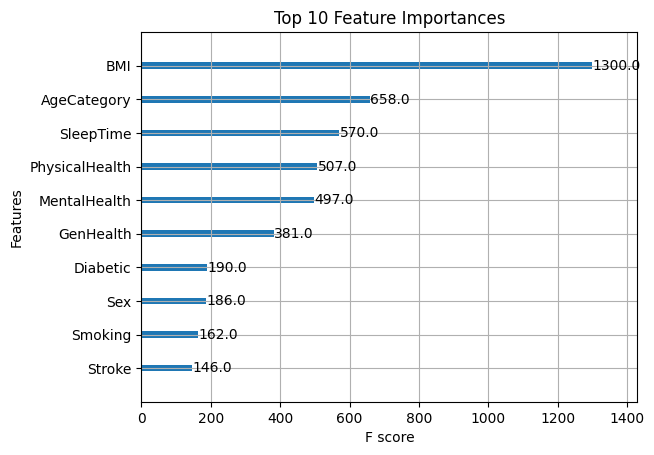

                  Importance
AgeCategory         0.191950
GenHealth           0.178233
Stroke              0.164092
Sex                 0.085723
KidneyDisease       0.055801
Diabetic            0.052017
DiffWalking         0.047447
Smoking             0.035599
Race_White          0.028472
Asthma              0.018265
AlcoholDrinking     0.016906
PhysicalHealth      0.015950
Race_Black          0.014287
SkinCancer          0.012696
BMI                 0.012448
Race_Hispanic       0.012142
MentalHealth        0.012021
SleepTime           0.011826
Race_Other          0.011800
Race_Asian          0.011671
PhysicalActivity    0.010652
Mean Cross-Validation F1 Score: 0.1687


In [ ]:
import xgboost as xgb
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Assuming df_scaled is your final scaled and encoded dataset
X = df_scaled.drop('HeartDisease', axis=1)
y = df_scaled['HeartDisease']

# Initialize XGBoost model
xgboost_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Perform cross-validation with F1 score as the metric
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(xgboost_model, X, y, cv=cv, scoring='f1')

# Fit the model on the entire dataset to get feature importances
xgboost_model.fit(X, y)

# Plot feature importance (top 10 features)
xgb.plot_importance(xgboost_model, importance_type='weight', max_num_features=10)
plt.title("Top 10 Feature Importances")
plt.show()

# Get feature importance scores and print them sorted
importance_scores = pd.DataFrame(xgboost_model.feature_importances_, index=X.columns, columns=['Importance'])
sorted_importance = importance_scores.sort_values(by='Importance', ascending=False)
print(sorted_importance)

# Print cross-validation F1 scores
print(f"Mean Cross-Validation F1 Score: {cv_scores.mean():.4f}")


In [ ]:
# Extract feature importance values used in the plot
xgb_importance_dict = xgboost_model.get_booster().get_score(importance_type='weight')

# Convert the dictionary to a sorted DataFrame for better readability
xgb_importance_df = pd.DataFrame(list(xgb_importance_dict.items()), columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)

# Display the values that were plotted
xgb_importance_df

,Feature,Importance
0,BMI,1300.0
8,AgeCategory,658.0
12,SleepTime,570.0
4,PhysicalHealth,507.0
5,MentalHealth,497.0
11,GenHealth,381.0
9,Diabetic,190.0
7,Sex,186.0
1,Smoking,162.0
3,Stroke,146.0


In [ ]:
xgb_importance_df.head(12)

,Feature,Importance
0,BMI,1300.0
8,AgeCategory,658.0
12,SleepTime,570.0
4,PhysicalHealth,507.0
5,MentalHealth,497.0
11,GenHealth,381.0
9,Diabetic,190.0
7,Sex,186.0
1,Smoking,162.0
3,Stroke,146.0


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.99      0.95    273684
           1       0.55      0.07      0.13     27206

    accuracy                           0.91    300890
   macro avg       0.73      0.53      0.54    300890
weighted avg       0.88      0.91      0.88    300890

F1 Score: 0.1313
Precision: 0.5515
Recall: 0.0745
Accuracy: 0.9108
ROC AUC Score: 0.8327


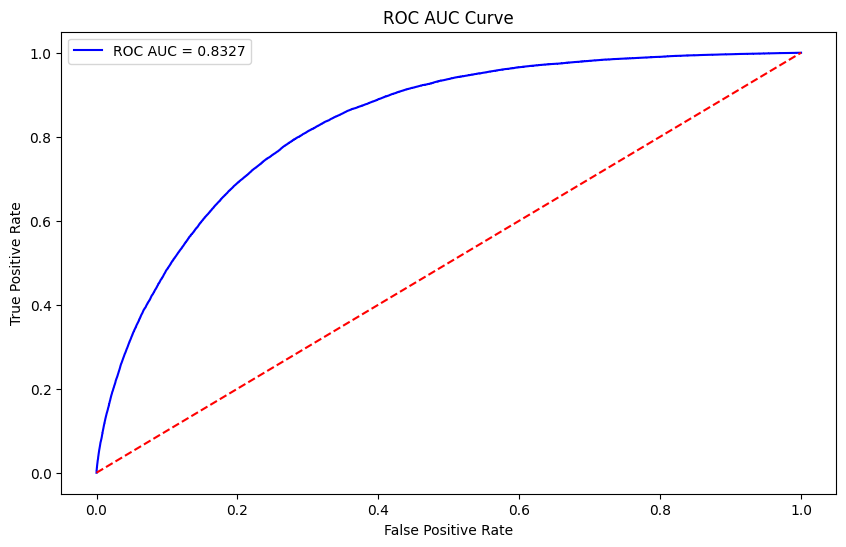

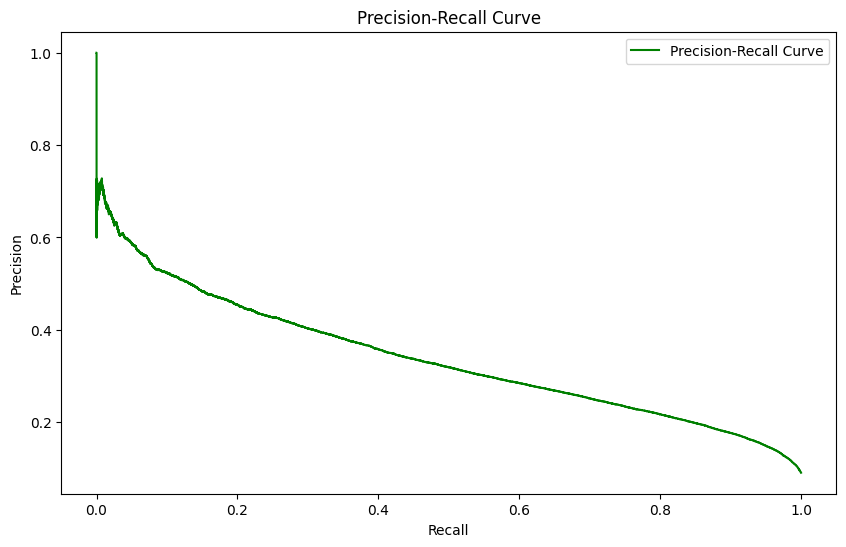

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_predict
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, classification_report
import matplotlib.pyplot as plt

# Step 1: Select the top 12 features
top_12_features = xgb_importance_df['Feature'].head(12).tolist()
X_top_12 = df_scaled[top_12_features]
y = df_scaled['HeartDisease']

# Step 2: Set up hyperparameter tuning with a reduced GridSearchCV
xgboost_model = xgb.XGBClassifier(use_label_encoder=False, random_state=42)

# Define a reduced parameter grid for tuning (150-200 fits)
param_grid = {
    'n_estimators': [100, 150],         # Reduced to 2 values
    'max_depth': [3, 5],                # Reduced to 2 values
    'learning_rate': [0.01, 0.1],       # Reduced to 2 values
    'subsample': [0.8, 1.0],            # Reduced to 2 values
    'colsample_bytree': [0.8, 1.0]      # Reduced to 2 values
}

# Perform 5-fold cross-validation with grid search
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=xgboost_model, param_grid=param_grid, scoring='f1', cv=cv, n_jobs=-1, verbose=2)
grid_search.fit(X_top_12, y)

# Get the best parameters from grid search
best_params = grid_search.best_params_

# Step 3: Train the final model with the best parameters using cross-validation
final_model = xgb.XGBClassifier(**best_params, use_label_encoder=False, random_state=42)

# Perform cross-validation and get the predictions
y_pred_proba = cross_val_predict(final_model, X_top_12, y, cv=cv, method='predict_proba')[:, 1]  # Get probability scores for ROC AUC

# Binary predictions for classification report and metrics
y_pred_binary = (y_pred_proba >= 0.5).astype(int)

# Step 4: Evaluate the model
# Print classification report
print("Classification Report:\n")
print(classification_report(y, y_pred_binary))

# Calculate and print other metrics
f1 = f1_score(y, y_pred_binary)
precision = precision_score(y, y_pred_binary)
recall = recall_score(y, y_pred_binary)
accuracy = accuracy_score(y, y_pred_binary)
roc_auc = roc_auc_score(y, y_pred_proba)

print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Step 5: Plot ROC AUC Curve
fpr, tpr, _ = roc_curve(y, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

# Step 6: Plot Precision-Recall Curve
precision_vals, recall_vals, _ = precision_recall_curve(y, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters from GridSearchCV: {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 300, 'scale_pos_weight': 5}

Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.86      0.91    273684
           1       0.29      0.57      0.39     27206

    accuracy                           0.84    300890
   macro avg       0.62      0.72      0.65    300890
weighted avg       0.89      0.84      0.86    300890

Confusion Matrix:
[[236314  37370]
 [ 11665  15541]]
F1 Score: 0.3880
Precision: 0.2937
Recall: 0.5712
Accuracy: 0.8370
ROC AUC Score: 0.8316


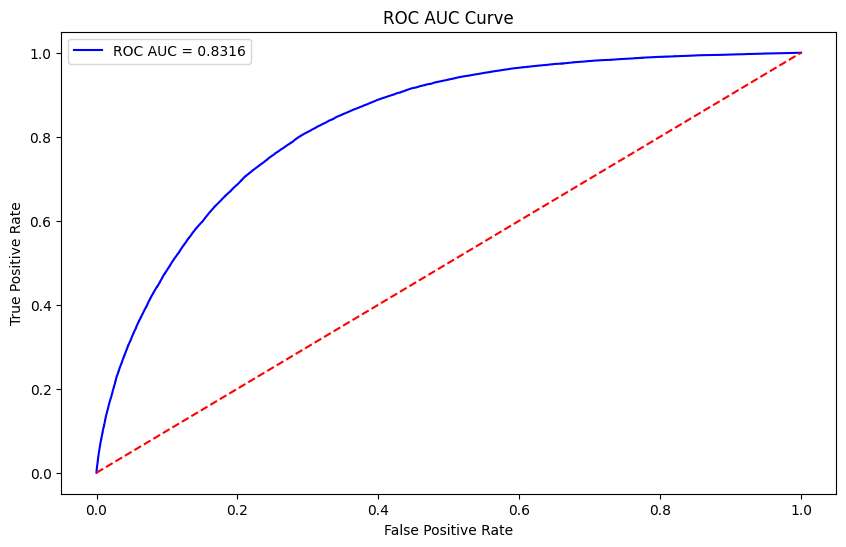

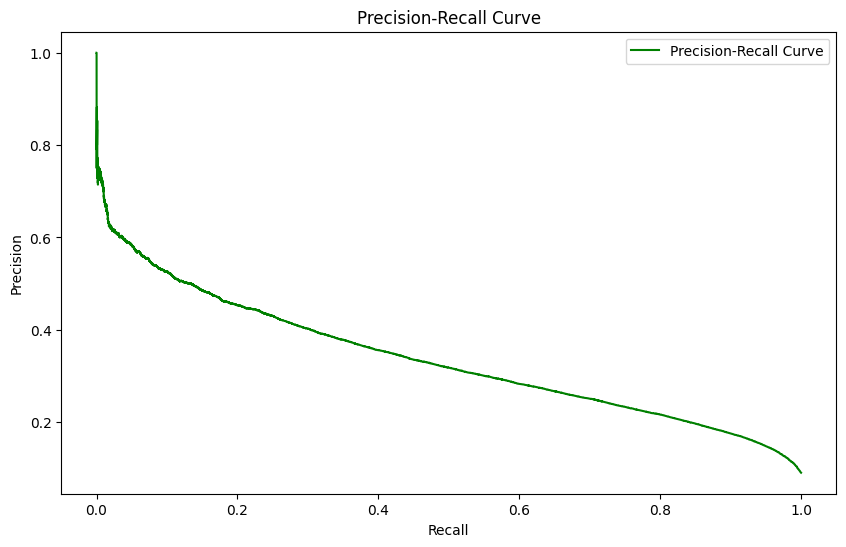

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Select the top 12 features
top_12_features = xgb_importance_df['Feature'].head(12).tolist()
X_top_12 = df_scaled[top_12_features]
y = df_scaled['HeartDisease']

# Step 2: Define the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Step 3: Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 6, 9],          # Depth of trees
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate for gradient boosting
    'n_estimators': [100, 200, 300], # Number of boosting rounds
    'scale_pos_weight': [1, 5, 10]   # Balancing positive and negative classes
}

# Step 4: Set up GridSearchCV with 3-fold cross-validation
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='f1', cv=cv, n_jobs=-1, verbose=1)

# Step 5: Fit GridSearchCV to the data
grid_search.fit(X_top_12, y)

# Step 6: Get the best model from GridSearchCV
best_xgb = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Parameters from GridSearchCV:", grid_search.best_params_)

# Step 7: Evaluate the final model using cross-validation
# Get predicted probabilities and binary predictions
y_pred_proba = cross_val_predict(best_xgb, X_top_12, y, cv=cv, method='predict_proba')[:, 1]
y_pred_binary = (y_pred_proba >= 0.5).astype(int)

# Step 8: Print classification report and confusion matrix
print("\nClassification Report:\n")
print(classification_report(y, y_pred_binary))

print("Confusion Matrix:")
print(confusion_matrix(y, y_pred_binary))

# Step 9: Calculate other evaluation metrics
f1 = f1_score(y, y_pred_binary)
precision = precision_score(y, y_pred_binary)
recall = recall_score(y, y_pred_binary)
accuracy = accuracy_score(y, y_pred_binary)
roc_auc = roc_auc_score(y, y_pred_proba)

print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Step 10: Plot ROC AUC curve
fpr, tpr, _ = roc_curve(y, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

# Step 11: Plot Precision-Recall curve
precision_vals, recall_vals, _ = precision_recall_curve(y, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90    273684
           1       0.93      0.86      0.89    273684

    accuracy                           0.90    547368
   macro avg       0.90      0.90      0.90    547368
weighted avg       0.90      0.90      0.90    547368

Confusion Matrix:
[[256832  16852]
 [ 38834 234850]]
ROC AUC Score: 0.9534


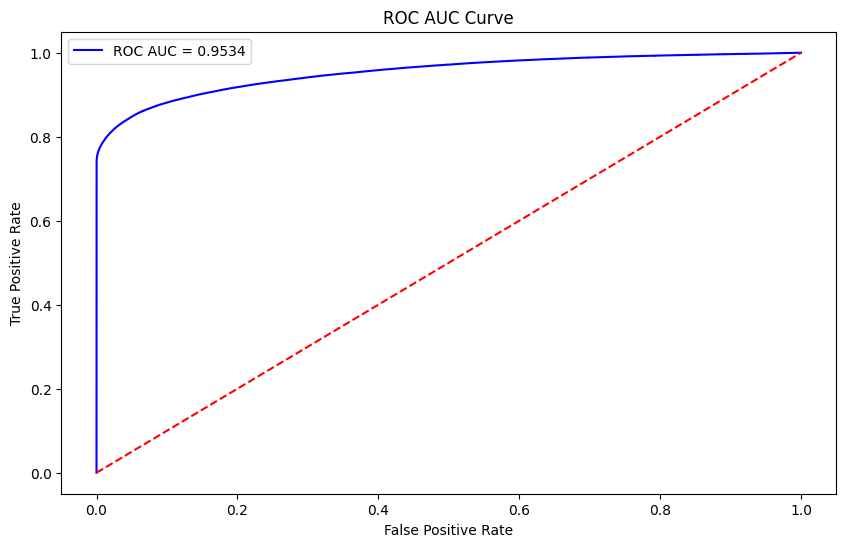

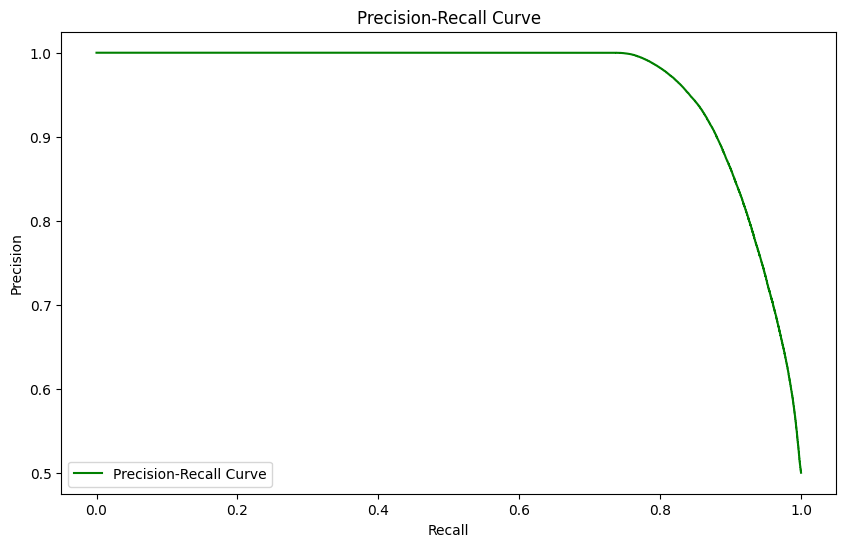

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
from imblearn.over_sampling import SMOTE

# Initialize SMOTE and resample the data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Define the parameter grid for XGBoost, replacing 'scale_pos_weight' with 'subsample'
param_grid = {
    'max_depth': [5, 7],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [ 200, 300],
    'subsample': [0.6, 0.8]  # Add subsample parameter
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='f1', cv=3, n_jobs=-1, verbose=1)

# Fit GridSearchCV on resampled data
grid_search.fit(X_resampled, y_resampled)

# Get the best model from GridSearchCV
best_xgb = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Use cross_val_predict to get predictions across all cross-validation folds
y_pred = cross_val_predict(best_xgb, X_resampled, y_resampled, cv=5, method='predict')
y_pred_proba = cross_val_predict(best_xgb, X_resampled, y_resampled, cv=5, method='predict_proba')[:, 1]

# Classification report
print("Classification Report:")
print(classification_report(y_resampled, y_pred))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_resampled, y_pred))

# ROC AUC score
roc_auc = roc_auc_score(y_resampled, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Plot ROC AUC curve
fpr, tpr, _ = roc_curve(y_resampled, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

# Plot Precision-Recall curve
precision_vals, recall_vals, _ = precision_recall_curve(y_resampled, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


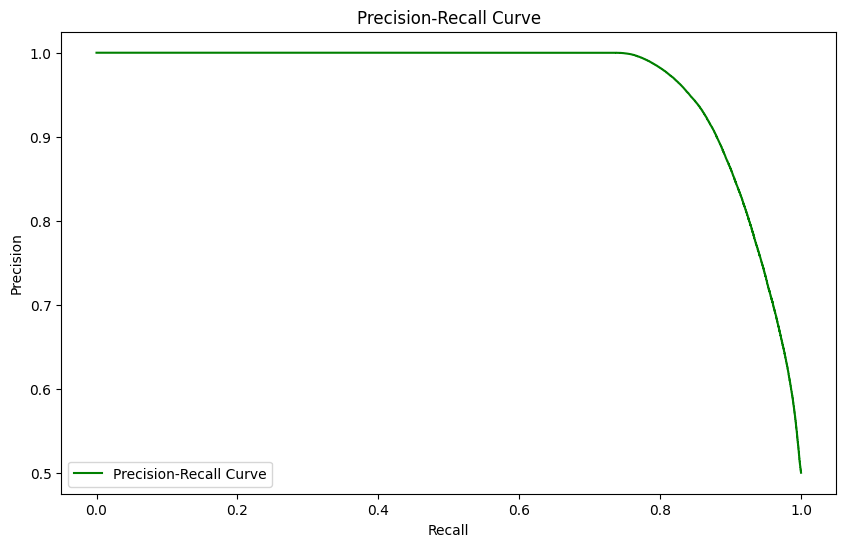

In [ ]:
# Step 14: Plot Precision-Recall curve
precision_vals, recall_vals, _ = precision_recall_curve(y_resampled, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(recall_vals, precision_vals, color='green', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

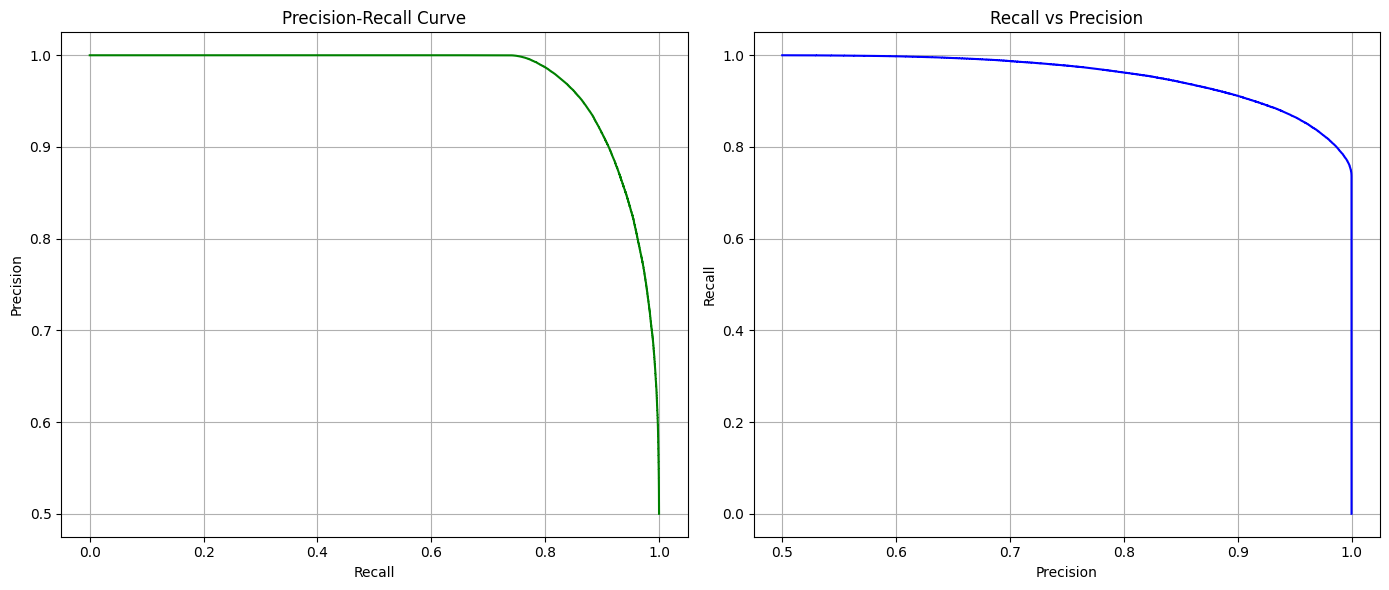

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Get predicted probabilities for the positive class
y_pred_proba = best_xgb.predict_proba(X_resampled)[:, 1]  # Assuming best_xgb is your trained model

# Compute Precision and Recall values
precision_vals, recall_vals, _ = precision_recall_curve(y_resampled, y_pred_proba)

# Plot Precision vs Recall
plt.figure(figsize=(14, 6))

# Precision-Recall curve
plt.subplot(1, 2, 1)
plt.plot(recall_vals, precision_vals, color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)

# Recall vs Precision
plt.subplot(1, 2, 2)
plt.plot(precision_vals, recall_vals, color='blue')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Recall vs Precision')
plt.grid(True)

plt.tight_layout()
plt.show()
